lenna.jpg shape: (768, 576, 3)
lenna.jpg dtype: uint8
//-------------------------------------------
original RGB lenna image


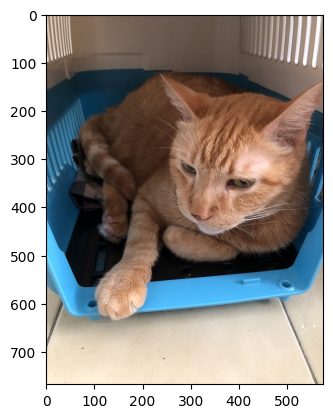

img shape: (768, 576, 3)
img dtype: uint8
//-------------------------------------------
grayscale lenna image


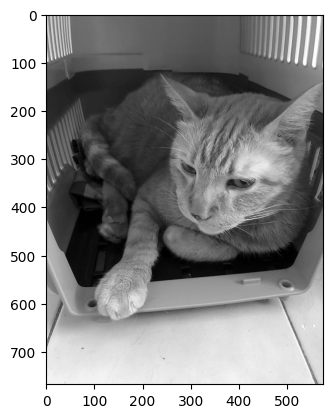

img_gray shape: (768, 576)
img_gray dtype: uint8
//-------------------------------------------


In [1]:
    
import cv2 
import matplotlib.pyplot as plt 

img = cv2.imread("input/cat.jpg") # BGR
print ("lenna.jpg shape:",img.shape)
print ("lenna.jpg dtype:",img.dtype)
print ("//-------------------------------------------")
print ("original RGB lenna image")
plt.imshow(img[:,:,::-1]) # BGR to RGB
# plt.imshow(img)
plt.show()
print ("img shape:",img.shape)
print ("img dtype:",img.dtype)
print ("//-------------------------------------------")
print ("grayscale lenna image")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()
print ("img_gray shape:",img_gray.shape)
print ("img_gray dtype:",img_gray.dtype)
print ("//-------------------------------------------")  
#opencv save image   
# cv2.imwrite('output/lenna_img_gray.jpg', img_gray) 

In [2]:
import numpy as np
def grayscale_Max(img):
    imgR = np.array(img[:,:,2])
    imgG = np.array(img[:,:,1])
    imgB = np.array(img[:,:,0])
    nimg = np.copy(imgR)
    for x in range(len(imgR[0])):
        for y in range(len(imgR[1])):
            nimg[x][y]=max(imgR[x][y],imgG[x][y],imgB[x][y])
    return nimg

In [3]:
ori_img = cv2.imread('input/cat.jpg')

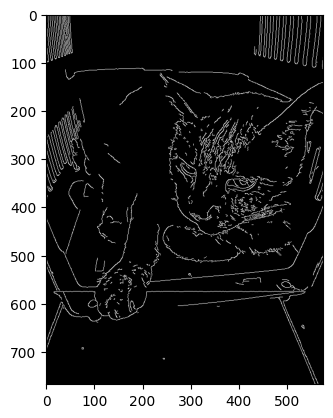

True

In [4]:
img = ori_img.copy()
img = grayscale_Max(img)
#img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 
img = cv2.medianBlur(img, 3)
# img = Image_Filter(img,method='medianBlur',size=3,show_image=False)
img = cv2.Canny(img,90,140)
ret, img = cv2.threshold(img,80,255,cv2.THRESH_BINARY)
plt.imshow(img, cmap="gray")
plt.show()
cv2.imwrite('output/cat.jpg', img)

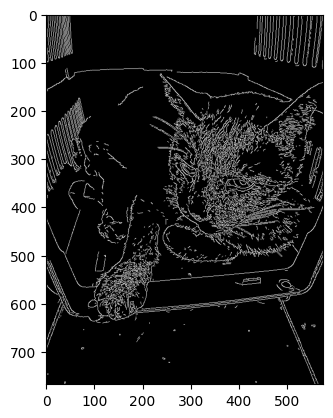

In [12]:
img = ori_img.copy()
img = cv2.Canny(img,90,130)
plt.imshow(img, cmap="gray")
plt.show()

In [72]:
def increase_contrast(img, alpha=1.5, beta=0):
    
    # Convert the image to float32 to prevent clipping during scale operation
    img_float32 = np.float32(img)
    
    # Scale pixel values (contrast adjustment) and clip the values to ensure they stay within [0, 255]
    contrast_img = np.clip(alpha * img_float32 + beta, 0, 255)
    
    # Convert back to uint8
    contrast_img = np.uint8(contrast_img)
    
    return contrast_img

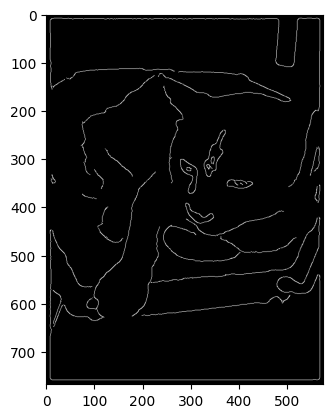

In [125]:
import cv2
import numpy as np

def get_cat_outline(img):
    gray = img[:,:,2]
    
    blur = cv2.GaussianBlur(gray, (7, 7), 20)

    blur = increase_contrast(blur, 2)
    blur = cv2.GaussianBlur(blur, (7, 7), 0)
    edges = cv2.Canny(blur, 50, 150)
    return edges

cat_outline = get_cat_outline(ori_img)
plt.imshow(cat_outline, cmap="gray")
plt.show()


lenna.jpg shape: (512, 512, 3)
lenna.jpg dtype: uint8
//-------------------------------------------
original RGB lenna image


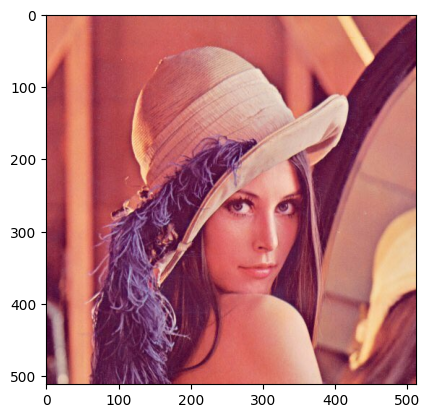

img shape: (512, 512, 3)
img dtype: uint8
//-------------------------------------------
grayscale lenna image


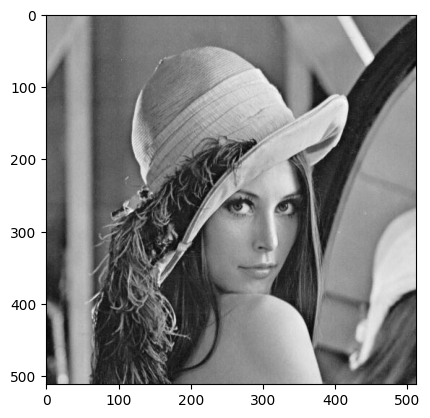

img_gray shape: (512, 512)
img_gray dtype: uint8
//-------------------------------------------


True

In [2]:
# In[1]: p4
    
import cv2 
import matplotlib.pyplot as plt 

img = cv2.imread("ori_image/lenna.jpg") # BGR
print ("lenna.jpg shape:",img.shape)
print ("lenna.jpg dtype:",img.dtype)
print ("//-------------------------------------------")
print ("original RGB lenna image")
plt.imshow(img[:,:,::-1]) # BGR to RGB
# plt.imshow(img)
plt.show()
print ("img shape:",img.shape)
print ("img dtype:",img.dtype)
print ("//-------------------------------------------")
print ("grayscale lenna image")
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray, cmap="gray")
plt.show()
print ("img_gray shape:",img_gray.shape)
print ("img_gray dtype:",img_gray.dtype)
print ("//-------------------------------------------")  
#opencv save image   
cv2.imwrite('ouutput/lenna_img_gray.jpg', img_gray) 

In [3]:
# In[2]: p6
'''
1. Sobel
2. Scharr
3. Laplacian
4. Canny
'''    

'\n1. Sobel\n2. Scharr\n3. Laplacian\n4. Canny\n'

//-------------------------------------------
Edge Detection- Sobel
sobel img absX


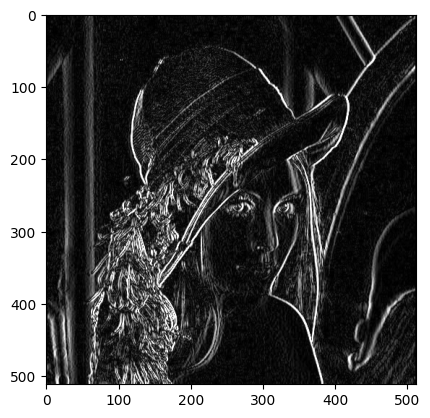

//-------------------------------------------
sobel img absY


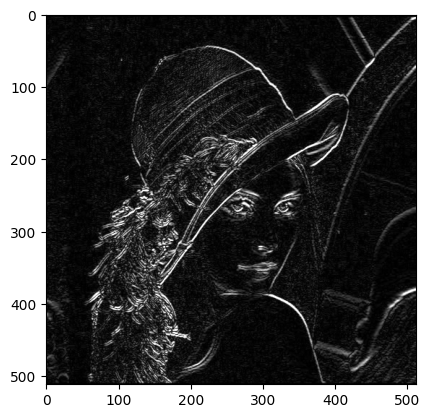

//-------------------------------------------
sobel img (absX+absY)*0.5


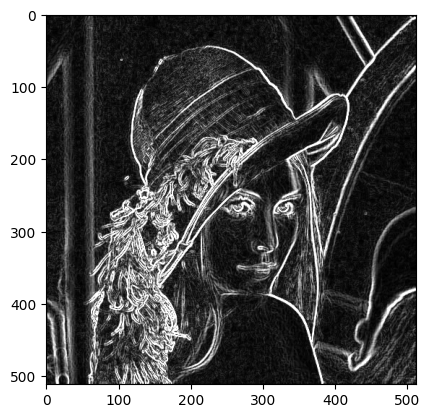

//-------------------------------------------


In [4]:
# In[3]: p6
print ("//-------------------------------------------")
print ("Edge Detection- Sobel")
# CV_16S : signed 16-bit
x = cv2.Sobel(img_gray, cv2.CV_16S, 1, 0, ksize=3) # 計算水平
y = cv2.Sobel(img_gray, cv2.CV_16S, 0, 1, ksize=3) # 計算垂直
# 轉回uint8
absX = cv2.convertScaleAbs(x)
absY = cv2.convertScaleAbs(y)

#show with plt
print("sobel img absX")
plt.imshow(absX, cmap="gray")
plt.show()
print ("//-------------------------------------------")
print("sobel img absY")
plt.imshow(absY, cmap="gray")
plt.show()
print ("//-------------------------------------------")
print("sobel img (absX+absY)*0.5")
sobel_img = cv2.addWeighted(absX, 0.5, absY, 0.5, 0) # (absX*0.5) + (absY*0.5) + 0
sobel_img = cv2.addWeighted(absX, 1, absY, 1, 0) # (absX*0.5) + (absY*0.5) + 0
plt.imshow(sobel_img, cmap="gray")
plt.show()
print ("//-------------------------------------------")

In [5]:
img_gray

array([[160, 162, 163, ..., 172, 160, 127],
       [161, 162, 163, ..., 171, 158, 123],
       [161, 162, 163, ..., 171, 158, 123],
       ...,
       [ 44,  45,  49, ..., 103, 102, 101],
       [ 43,  45,  50, ..., 104, 105, 110],
       [ 43,  45,  51, ...,  98, 101, 110]], dtype=uint8)

In [6]:
absY.shape

(512, 512)

In [9]:
# In[4]: p8
#show with opencv
print ('跳出opencv視窗 請勿直接關閉!!!') 
print ('在opencv視窗中 按任意鍵即可跳出')
cv2.imshow("img", img)
cv2.imshow("img_gray", img_gray)
cv2.imshow("absY", absY)
cv2.imshow("absX", absX)  
cv2.imshow("sobel_img", sobel_img)
cv2.waitKey(0)
# cv2.destroyAllWindows()
    
#opencv save image
cv2.imwrite('ouutput/lenna_sobel_absY.jpg', absY) 
cv2.imwrite('ouutput/lenna_sobel_absX.jpg', absX) 
cv2.imwrite('ouutput/lenna_sobel.jpg', sobel_img) 
print ("//-------------------------------------------")

跳出opencv視窗 請勿直接關閉!!!
在opencv視窗中 按任意鍵即可跳出
//-------------------------------------------


In [24]:
# In[5]: p9
from PIL import Image
def Edge_Detection(img,method,gray=True,XY=(1,1),Weight=(0.5,0.5,0),th=(30,150),size=3,save_image=True,show_image=True):
    # RGB to grayscale
    if gray:
        try:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        except:
            print ('Error!!! check your [img] shape/dtype')
            return
       
    # Edge_Detection
    if method=='Sobel':
        img_x = cv2.Sobel(img, cv2.CV_16S, XY[0], 0, ksize=size) # 計算水平
        img_y = cv2.Sobel(img, cv2.CV_16S, 0, XY[1], ksize=size) # 計算垂直

    elif method=='Scharr':
        img_x = cv2.Scharr(img,cv2.CV_64F, XY[0], 0)
        img_y = cv2.Scharr(img,cv2.CV_64F, 0, XY[1])
    
    elif method=='Laplacian':
        post_img = cv2.Laplacian(img, cv2.CV_16S, ksize=size)
        post_img = cv2.convertScaleAbs(post_img)
        
    elif method=='Canny':
        if gray:
            post_img = cv2.Canny(img, th[0], th[1], apertureSize=size)
        else:
            print ('Error!!! Canny must be converted to grayscale, set gray=True')
            return
    else:
        print ('method have to be Sobel, Scharr, Laplacian or Canny')
        
    
    # addWeight for Sobel and Scharr
    if method=='Sobel' or method=='Scharr':
        absX = cv2.convertScaleAbs(img_x)
        absY = cv2.convertScaleAbs(img_y)
        post_img=cv2.addWeighted(absX, Weight[0], absY, Weight[1], Weight[2])
       
    # save image or not    
    if save_image: cv2.imwrite('ouutput/lenna_'+method+'.jpg', post_img) 
    
    print ('edge detect method:',method)
    print ('post_img.shape:',post_img.shape)
    print ('post_img.dtype',post_img.dtype)
    print ("//-------------------------------------------")
    
    # show image or not 
    if show_image:
        # cv2.imshow(str(method)+"_post_img", post_img)
        # cv2.waitKey(0)
        # cv2.destroyAllWindows()
        img = Image.fromarray(post_img)
        plt.title(str(method)+"_post_img")
        plt.imshow(post_img, cmap='gray')
        plt.show()
        
    return post_img

edge detect method: Sobel
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


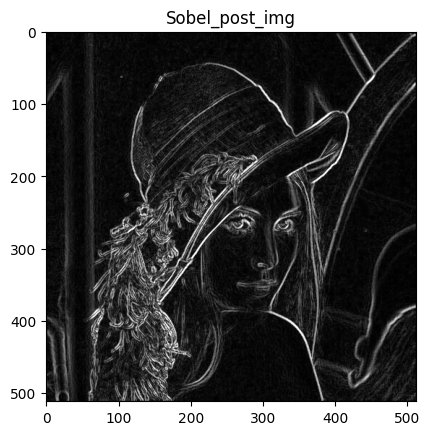

edge detect method: Sobel
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


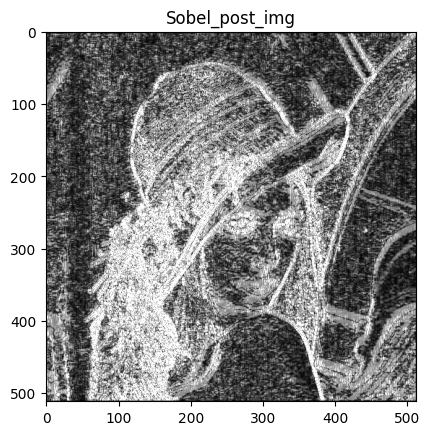

edge detect method: Sobel
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


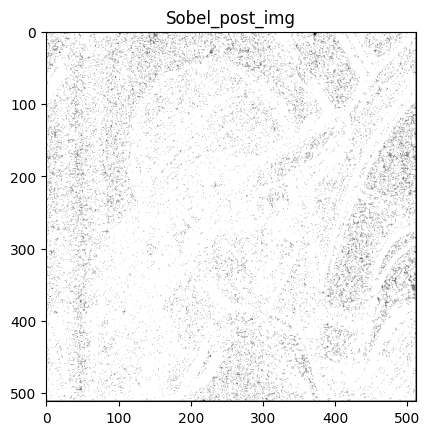

edge detect method: Scharr
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


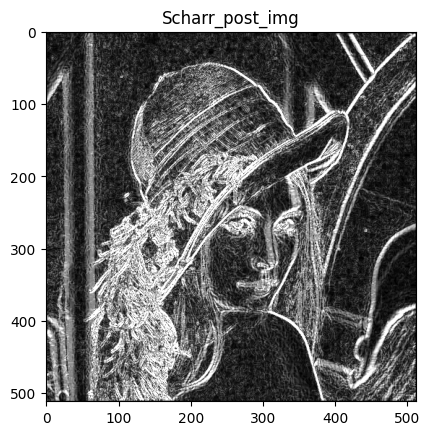

edge detect method: Laplacian
post_img.shape: (512, 512, 3)
post_img.dtype uint8
//-------------------------------------------


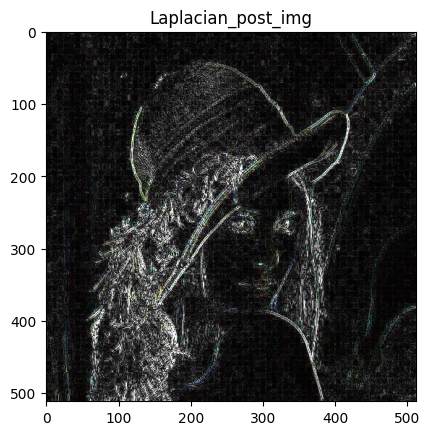

edge detect method: Laplacian
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


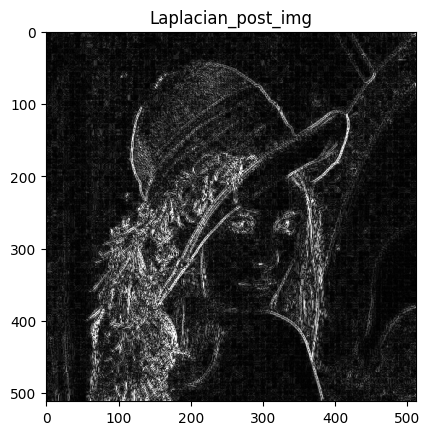

edge detect method: Canny
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


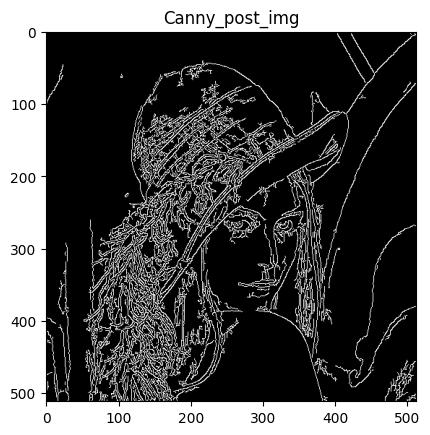

In [32]:
# In[6]: p13
'''
Edge_Detection(img,method='Sobel,gray=True',XY=(1,1),Weight=(0.5,0.5,0),th=None,size=3,save_image=True)  
XY must not contain 0 (i.e. xy=(1,0), xy=(0,1) will be error) 

Try yourself 
'''
#sobel 
Edge_Detection(img,'Sobel') 
Edge_Detection(img,'Sobel',XY=(3,1),size=5) 
Edge_Detection(img,'Sobel',size=7) 
 
#Scharr 
Edge_Detection(img,'Scharr')  

#Laplacian 
Edge_Detection(img,'Laplacian',gray=False) 
Edge_Detection(img,'Laplacian') 
#Canny 
post_img=Edge_Detection(img,'Canny')      

edge detect method: Sobel
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


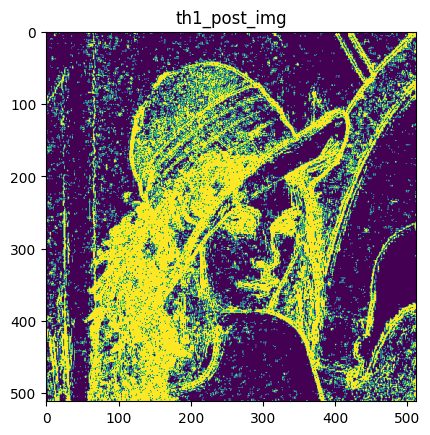

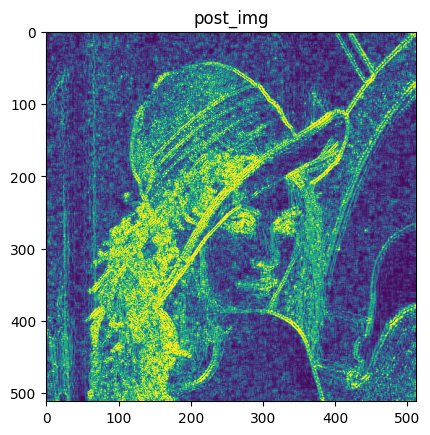

100.0


In [42]:
# In[7]: p14           
'''
Binarization without filter
'''
post_img=Edge_Detection(img,'Sobel',XY=(2,2),size=5,show_image=False)  
ret, th1 = cv2.threshold(post_img,100,255,cv2.THRESH_BINARY)
# cv2.imshow('th1_post_img', th1)
# cv2.imshow('post_img', post_img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()
plt.imshow(th1)
plt.title("th1_post_img")
plt.show()

plt.imshow(post_img)
plt.title("post_img")
plt.show()

print(ret)

117.0


(<Axes: >, <matplotlib.image.AxesImage at 0x161829b10>)

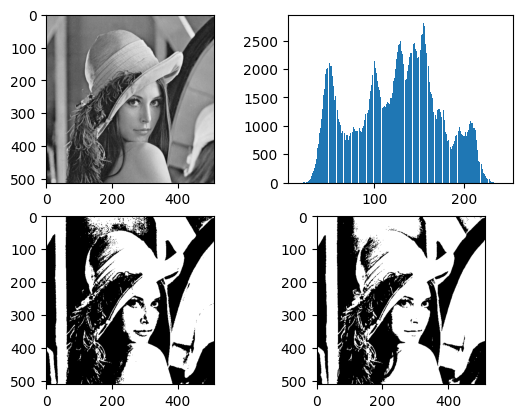

: 

In [52]:
import cv2
import matplotlib.pyplot as plt

img = cv2.imread('ori_image/lenna.jpg',0) #直接读为灰度图像
#简单滤波
ret1,th1 = cv2.threshold(img,127,255,cv2.THRESH_BINARY)
#Otsu 滤波
ret2,th2 = cv2.threshold(img,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print (ret2)
plt.figure()
plt.subplot(221),plt.imshow(img,'gray')
plt.subplot(222),plt.hist(img.ravel(),256)#.ravel方法将矩阵转化为一维
plt.subplot(223),plt.imshow(th1,'gray')
plt.subplot(224),plt.imshow(th2,'gray')

edge detect method: Sobel
post_img.shape: (512, 512)
post_img.dtype uint8
//-------------------------------------------


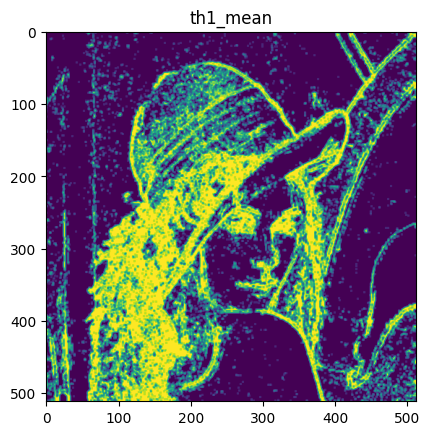

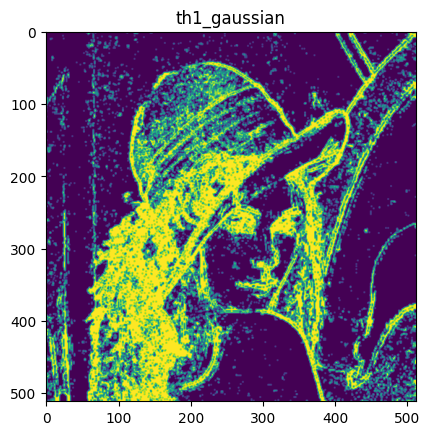

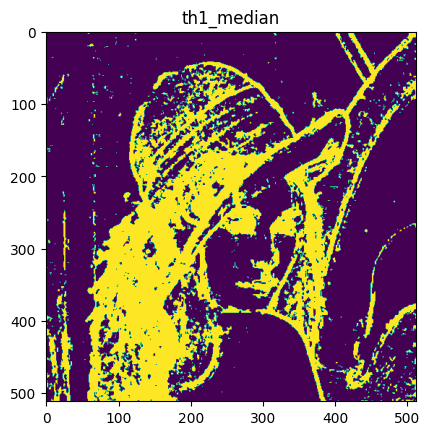

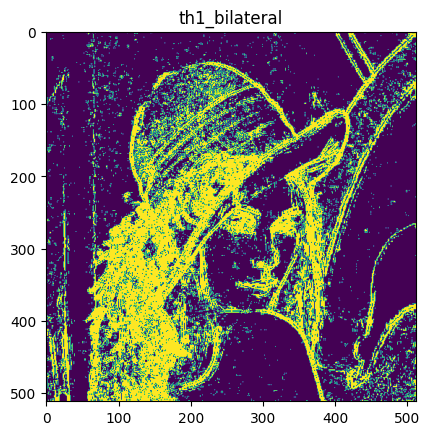

In [35]:
# In[8]: p15 
'''
pre-filter or post-filter
'''
''' set pre-filter '''
pre_img = img
#pre_img = cv2.blur(img, (3,3))
# pre_img = cv2.GaussianBlur(img, (5, 5), 0)
#pre_img = cv2.medianBlur(img, 3)
#pre_img = cv2.bilateralFilter(img,3,75,75)

post_img=Edge_Detection(pre_img,'Sobel',XY=(2,2),size=5,show_image=False)  

''' set post-filter '''
th1_mean = cv2.blur(th1, (3,3))
th1_gaussian = cv2.GaussianBlur(th1, (3, 3), 0)
th1_median = cv2.medianBlur(th1, 3)
th1_bilateral = cv2.bilateralFilter(th1,3,75,75)

ret, th1 = cv2.threshold(post_img,127,255,cv2.THRESH_BINARY)


# cv2.imshow('th1_post_img', th1)
# cv2.imshow('post_img', post_img)
cv2.imshow('th1_mean', th1_mean)
cv2.imshow('th1_gaussian', th1_gaussian)
cv2.imshow('th1_median', th1_median)
cv2.imshow('th1_bilateral', th1_bilateral)

plt.imshow(th1_mean)
plt.title("th1_mean")
plt.show()

plt.imshow(th1_gaussian)
plt.title("th1_gaussian")
plt.show()

plt.imshow(th1_median)
plt.title("th1_median")
plt.show()

plt.imshow(th1_bilateral)
plt.title("th1_bilateral")
plt.show()

# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [ ]:
# In[]: p17

def Image_Filter (img,method,size=3,show_image=False): 
    if method=='blur':
        img = cv2.blur(img, (size,size))
    elif method=='GaussianBlur':
        img = cv2.GaussianBlur(img, (size, size), 0)
    elif method=='medianBlur':
        img = cv2.medianBlur(img, size)
    elif method=='bilateralFilter':
        img = cv2.bilateralFilter(img,size,75,75)
    else:
        print ('method have to be blur, GaussianBlur, medianBlur or bilateralFilter')
    if show_image:
        cv2.imshow("Image_Filter", img)
        cv2.waitKey(0)
        cv2.destroyAllWindows()

    return img

In [ ]:
# In[]: p18
''' 上課練習-- 試著調整配置 輸出最佳邊緣 '''
img = cv2.imread("ori_image/lenna.jpg")
# turn to grayscale first
pre_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)  
# pre-filter
pre_img = Image_Filter(pre_img,'GaussianBlur',size=3,show_image=True)
# edge detection
post_img=Edge_Detection(pre_img,'Sobel',gray=False,show_image=True)
# post-filter
post_img=Image_Filter(post_img,'GaussianBlur',show_image=True)
# Binarization
ret, th1 = cv2.threshold(post_img,127,255,cv2.THRESH_BINARY)



cv2.imshow('post_img', post_img)
cv2.imshow('th1_post_img', th1)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('ouutput/lenna_final.jpg', th1)


In [ ]:
# In[]: p19
''' 回家作業1-- 試著調整配置 輸出最佳邊緣 '''  
